DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм
кластеризации, который группирует близкие друг к другу точки в кластеры и считает точки,
которые не принадлежат ни одному кластеру, выбросами или шумом. В отличие от
алгоритмов, таких как K-means, DBSCAN не требует заранее заданного количества
кластеров и может работать с кластерами произвольной формы.

Основные понятия DBSCAN:
1. Эпсилон (ε) — радиус, в пределах которого точки могут быть соседями.
2. Минимальное количество соседей (minPts) — минимальное количество точек, которые
должны быть в пределах радиуса эпсилона, чтобы точку можно было считать "срединной"
точкой кластера (не шумом).
3. Ядровая точка — точка, у которой в радиусе эпсилон есть не менее minPts точек
(включая саму себя).
4. Шумная точка — точка, не являющаяся ядровой точкой и не имеющая достаточного
количества соседей, чтобы быть частью какого-либо кластера.
5. Граничная точка — точка, которая находится в пределах радиуса эпсилона от ядровой
точки, но сама не имеет достаточно соседей для того, чтобы быть ядровой.

Пример работы DBSCAN

Предположим, у нас есть набор точек на плоскости. Рассмотрим радиус эпсилона
как 1.0 и minPts как 3.

Допустим, у нас есть следующие точки:

- T1 (0, 0)
- T2 (0.5, 0.5)
- T3 (1, 0)
- T4 (3, 3)
- T5 (3.5, 3.5)
- T6 (10, 10)

Шаги работы DBSCAN:

1. Определение ядровых точек: Для точки T1 (0, 0), смотрим все точки в радиусе 1.0. Точки
T1, T2 и T3 находятся в пределах радиуса, и их 3, что больше или равно minPts (3). Значит,
T1 — ядровая точка. Аналогично проверяем точки T2 и T3. Все они имеют достаточное
количество соседей в пределах радиуса, поэтому они тоже являются ядровыми точками.
2. Группировка точек в кластеры: Точки T1, T2, T3 образуют первый кластер, так как они
соединены друг с другом в пределах радиуса эпсилон. Точки T4 и T5 также могут быть
сгруппированы в отдельный кластер, так как они находятся в пределах радиуса друг от
друга, и их количество также соответствует minPts.
3. Выделение шумных точек: Точка T6 (10, 10) не имеет соседей в пределах радиуса
эпсилон, и она не может быть частью ни одного кластера. Следовательно, T6 считается
шумом.

Преимущества DBSCAN:

- Алгоритм не требует заранее заданного числа кластеров, что делает его гибким для
разных типов данных.
- DBSCAN может обнаруживать кластеры произвольной формы, в отличие от других
алгоритмов, которые ограничиваются сферическими кластерами.
- Он автоматически обнаруживает шумные точки.

Пример кода на Python с использованием библиотеки `sklearn`:

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
# Данные: набор точек
X = np.array([[0, 0], [0.5, 0.5], [1, 0], [3, 3], [3.5, 3.5], [10, 10]])

In [3]:
# Применяем DBSCAN
db = DBSCAN(eps=1.0, min_samples=3)
db.fit(X)

DBSCAN(eps=1.0, min_samples=3)

In [4]:
# Получаем метки кластеров (-1 — шум)
labels = db.labels_

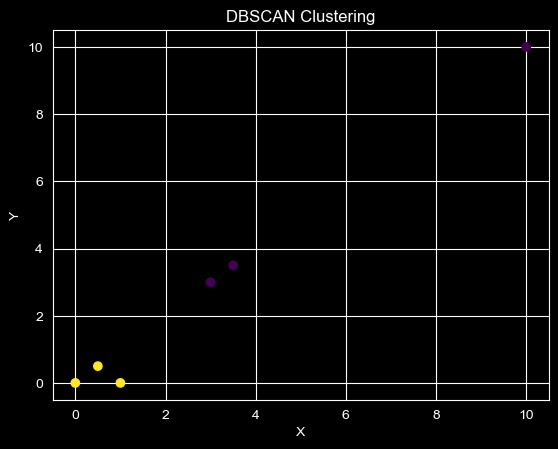

In [5]:
# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

В этом примере `DBSCAN` ищет кластеры в данных, используя радиус эпсилона `1.0`
и минимальное количество соседей `3`. Результат визуализируется, где различные
кластеры отображаются разными цветами, а точки, которые считаются шумом, отмечены
как -1.

Применение кластеризации для анализа данных

Представь себе, что ты работаешь в интернет-магазине, и у тебя есть огромная база
данных о покупателях: их покупки, частота заказов, средняя сумма чека, возраст,
предпочтения. Тебе нужно понять, какие группы клиентов существуют, чтобы предложить
им персонализированные акции или рекомендации. Но как их разделить? Здесь на помощь
приходит кластеризация.

Допустим, у тебя есть три типа покупателей:
1. Те, кто часто заказывает небольшие и недорогие товары. Они заходят в магазин почти
каждый день, но не тратят много денег за раз.
2. Те, кто делает редкие, но крупные покупки — раз в месяц или даже реже, но сразу на
большую сумму.
3. Те, кто делает покупки нерегулярно, без четкой системы, но в среднем их заказы
довольно стабильны по размеру.

Если пытаться вручную разделить клиентов, придется просмотреть тысячи записей
и гадать, кто относится к какой группе. Но DBSCAN автоматически выявит эти кластеры,
анализируя плотность данных. Он сгруппирует людей, поведение которых похоже, и
выделит тех, кто не вписывается ни в одну из групп (например, новых покупателей, у
которых еще мало данных, или аномальных клиентов, делающих единичные большие
покупки).

Теперь ты можешь использовать результаты. Первой группе можно предложить
подписку на доставку, ведь они часто покупают. Второй — скидку на большие заказы.
Третьей — напомнить о себе и предложить что-то, основываясь на их предыдущих
покупках.

Кластеризация применяется не только в маркетинге. В медицине она помогает
находить группы пациентов с похожими симптомами, в кибербезопасности — выявлять
подозрительную активность в сети, а в науке — анализировать геоданные, находя
аномалии в распределении землетрясений или погодных условий. Алгоритм DBSCAN
особенно удобен, когда кластеры имеют сложную форму и заранее неизвестно их
количество.

Пример задачи: Кластеризация клиентов интернет-магазина

Допустим, у нас есть база данных о клиентах интернет-магазина с такими
характеристиками:
- Частота покупок (сколько раз в месяц клиент делает заказ)
- Средняя сумма заказа

Наша цель — сгруппировать клиентов с похожим поведением с помощью DBSCAN и
понять, какие группы существуют.
1. Генерация данных

Создадим искусственный набор данных, имитирующий реальных клиентов.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [7]:
# Генерация случайных данных: (Частота покупок, Средняя сумма заказа)
data = np.array([
[2, 20], [3, 25], [2, 22], [3, 28], [4, 26], # Группа 1 (часто, но дешево)
[10, 100], [11, 110], [12, 105], [10, 95], [11, 98], # Группа 2 (редко, но дорого)
[5, 50], [6, 55], [7, 53], [6, 52], [5, 48], # Группа 3 (средние траты)
[15, 200] # Аномальный клиент (шум)
])

In [8]:
# Масштабируем данные для лучшей работы алгоритма
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
# Применяем DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3) # Параметры нужно подбирать экспериментально
labels = dbscan.fit_predict(data_scaled)

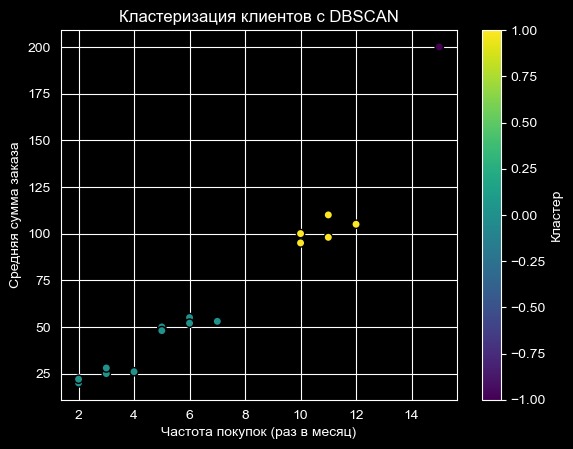

In [10]:
# Визуализация результатов
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel("Частота покупок (раз в месяц)")
plt.ylabel("Средняя сумма заказа")
plt.title("Кластеризация клиентов с DBSCAN")
plt.colorbar(label="Кластер")
plt.show()

Разбор работы кода.

Мы создали три естественные группы клиентов:
- Одни покупают часто, но тратят мало.
- Другие делают редкие, но дорогие заказы.
- Третьи находятся посередине.
- Также добавили одного аномального клиента, который сильно выбивается.

Стандартизировали данные, чтобы алгоритм работал корректно, так как DBSCAN
чувствителен к масштабу.

Применили DBSCAN, указав `eps=0.8` (радиус соседства) и `min_samples=3` (чтобы
точку считали кластером, рядом должно быть минимум 3 других точки).

Результаты визуализированы, где точки одного цвета принадлежат одному
кластеру, а выброс (аномалия) отмечен отдельно.